In [131]:
import pandas as pd
import numpy as np 

# LESSON 1
In this lesson we show the following: 
- DataFrame and Series with pandas


### What is pandas?
Pandas is a data manipulation package in Python for tabular data. 

Pandas provides two types of classes for handling data:
- Series: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.
- DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [132]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [133]:
df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#### Get read dataframe 
It is possible read a Dataframe from a file as excel or csv.  

In [134]:
df_diamonds = pd.read_csv('..\data\diamonds.csv', index_col=0)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Get item 
How to return item from dataframe

In [135]:
#return column  
df_diamonds['cut']

1            Ideal
2          Premium
3             Good
4          Premium
5             Good
           ...    
53936        Ideal
53937         Good
53938    Very Good
53939      Premium
53940        Ideal
Name: cut, Length: 53940, dtype: object

In [136]:
# return row , slice 
df_diamonds[0:2]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [137]:
df_diamonds.loc[1]['depth']

61.5

#### Condition and Filter

In [138]:
mask = df_diamonds['cut'] == 'Ideal'
df_diamonds[mask]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
17,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
40,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53926,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53927,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53930,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [139]:
mask = (df_diamonds['cut'] == 'Ideal') & (df_diamonds['price'] <= 1000)
df_diamonds[mask]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
17,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
40,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53635,0.30,Ideal,D,SI1,61.6,56.0,552,4.30,4.34,2.66
53636,0.30,Ideal,I,VVS1,62.1,56.0,552,4.30,4.33,2.68
53637,0.30,Ideal,D,SI1,61.6,57.0,552,4.28,4.32,2.65
53639,0.30,Ideal,D,SI1,61.0,57.0,552,4.29,4.33,2.63


In [140]:
mask = df_diamonds['cut'].isin(['Ideal', 'Good'])
df_diamonds[mask]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53930,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61


#### Add new elements

In [141]:
df_diamonds['new_price'] = df_diamonds['price'] + 10 
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,336
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,336
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,337
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,344
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,345


In [142]:
df_ideal = df_diamonds[df_diamonds['cut']== 'Ideal']
df_good = df_diamonds[df_diamonds['cut']== 'Good']

pd.concat([df_good, df_ideal])

,carat,cut,color,clarity,depth,table,price,x,y,z,new_price
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,337
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,345
11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,349
18,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70,361
19,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71,361
...,...,...,...,...,...,...,...,...,...,...,...
53926,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67,2766
53927,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54,2766
53930,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53,2766
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2767


#### Apply function

In [143]:
def upper_case(word: str):
    """ this function transform a lower case in upper case """
    return word.upper()

df_diamonds['cut'].apply(lambda x: upper_case(x))

1            IDEAL
2          PREMIUM
3             GOOD
4          PREMIUM
5             GOOD
           ...    
53936        IDEAL
53937         GOOD
53938    VERY GOOD
53939      PREMIUM
53940        IDEAL
Name: cut, Length: 53940, dtype: object

#### Merge 

In [144]:
import uuid
df_diamonds['id_diamonds'] = df_diamonds['carat'].apply(lambda x: str(uuid.uuid4())[:7])
df_size = df_diamonds[['id_diamonds', 'x', 'y', 'z']]
df_diamond = df_diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'id_diamonds']]

In [145]:
#df_diamonds.merge()

In [146]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bac', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [147]:
#print(pd.concat([df1, df2], axis=1)) 

#### Group by

In [152]:
df_diamond.groupby(['cut'])['carat'].mean()

cut
Fair         1.046137
Good         0.849185
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Name: carat, dtype: float64

### What is Matplotlib and Seaborn? 
Python library for creating static, interactive, and animated plots and visualizations in a variety of formats. It provides a wide range of functionalities for creating plots, charts, and other visual representations of data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_diamond = pd.read_csv('../data/diamonds.csv', index_col=0)
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='price', ylabel='Count'>

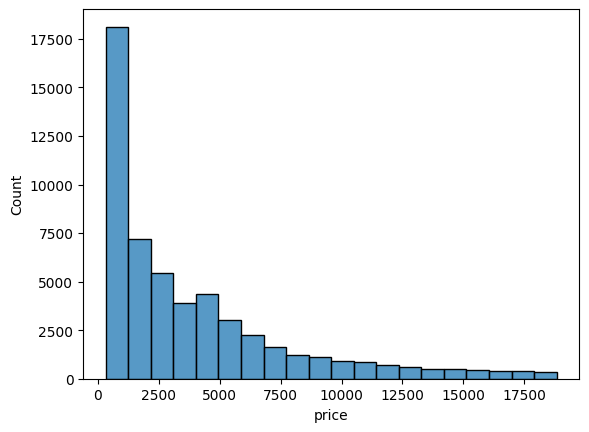

In [ ]:
sns.histplot(df_diamond, x='price', bins = 20)

<Axes: xlabel='carat', ylabel='depth'>

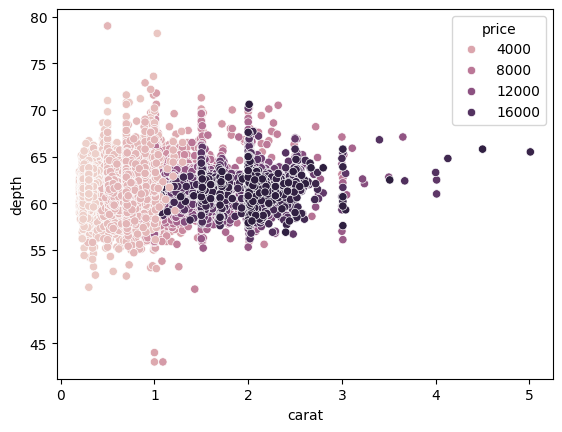

In [ ]:
sns.scatterplot(df_diamond, x='carat', y='depth', hue='price')

### Exercise

#### EX 1
Leggere il dataframe con la libreria os

#### EX 2

How many not breke_rt there are?  

#### EX 3
Transform second time in minut time  

#### EX 4
what is the mean of sec_rt